In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import pickle
import sklearn
import scipy

 
sns.set()


In [26]:
#from google.colab import files 
#uploaded=files.upload() 
df=pd.read_csv('lung_cancer_examples.csv') 
#dataset=df.values 


In [27]:
df.head()

,Age,Smokes,AreaQ,Alcohol,Result
0,35,3,5,4,1
1,27,20,2,5,1
2,30,0,5,2,0
3,28,0,8,1,0
4,68,4,5,6,1


In [28]:
df.shape


(59, 5)

In [29]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Age      59 non-null     int64
 1   Smokes   59 non-null     int64
 2   AreaQ    59 non-null     int64
 3   Alcohol  59 non-null     int64
 4   Result   59 non-null     int64
dtypes: int64(5)
memory usage: 2.4 KB


In [30]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Age,59.0,42.627119,16.235230,18.0,29.0,39.0,55.0,77.0
Smokes,59.0,15.067797,7.984607,0.0,10.0,15.0,20.0,34.0
AreaQ,59.0,5.203390,2.461984,1.0,3.0,5.0,7.5,10.0
Alcohol,59.0,3.237288,2.380517,0.0,1.0,3.0,5.0,8.0
Result,59.0,0.474576,0.503640,0.0,0.0,0.0,1.0,1.0


In [31]:
df= df.dropna(axis='rows')

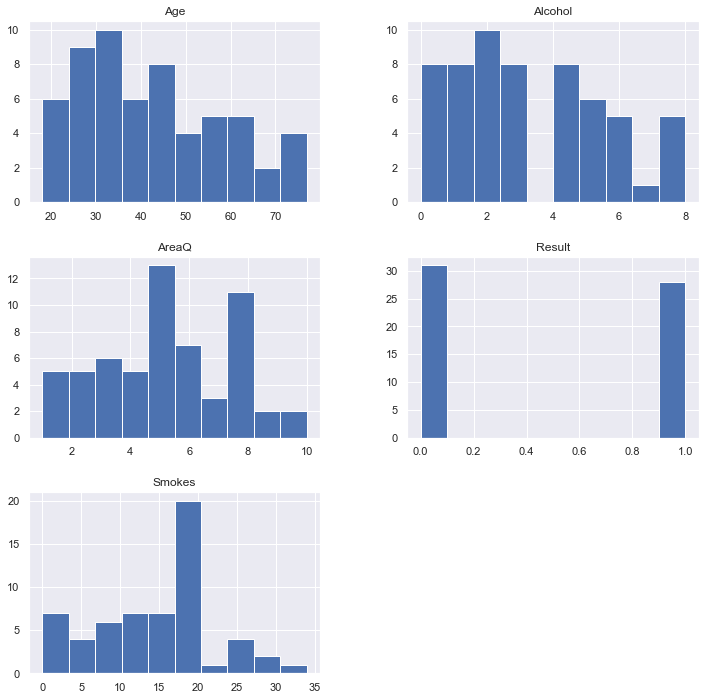

In [32]:
p = df.hist(figsize = (12,12))

In [33]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Age,59.0,42.627119,16.235230,18.0,29.0,39.0,55.0,77.0
Smokes,59.0,15.067797,7.984607,0.0,10.0,15.0,20.0,34.0
AreaQ,59.0,5.203390,2.461984,1.0,3.0,5.0,7.5,10.0
Alcohol,59.0,3.237288,2.380517,0.0,1.0,3.0,5.0,8.0
Result,59.0,0.474576,0.503640,0.0,0.0,0.0,1.0,1.0


In [34]:
df.head()  

#df = df.drop(columns=['Name','Surname'],axis=1)
#df = df.dropna(how='any') 

,Age,Smokes,AreaQ,Alcohol,Result
0,35,3,5,4,1
1,27,20,2,5,1
2,30,0,5,2,0
3,28,0,8,1,0
4,68,4,5,6,1


In [35]:
#for i in range(14):
    
    #print(df.columns[i])


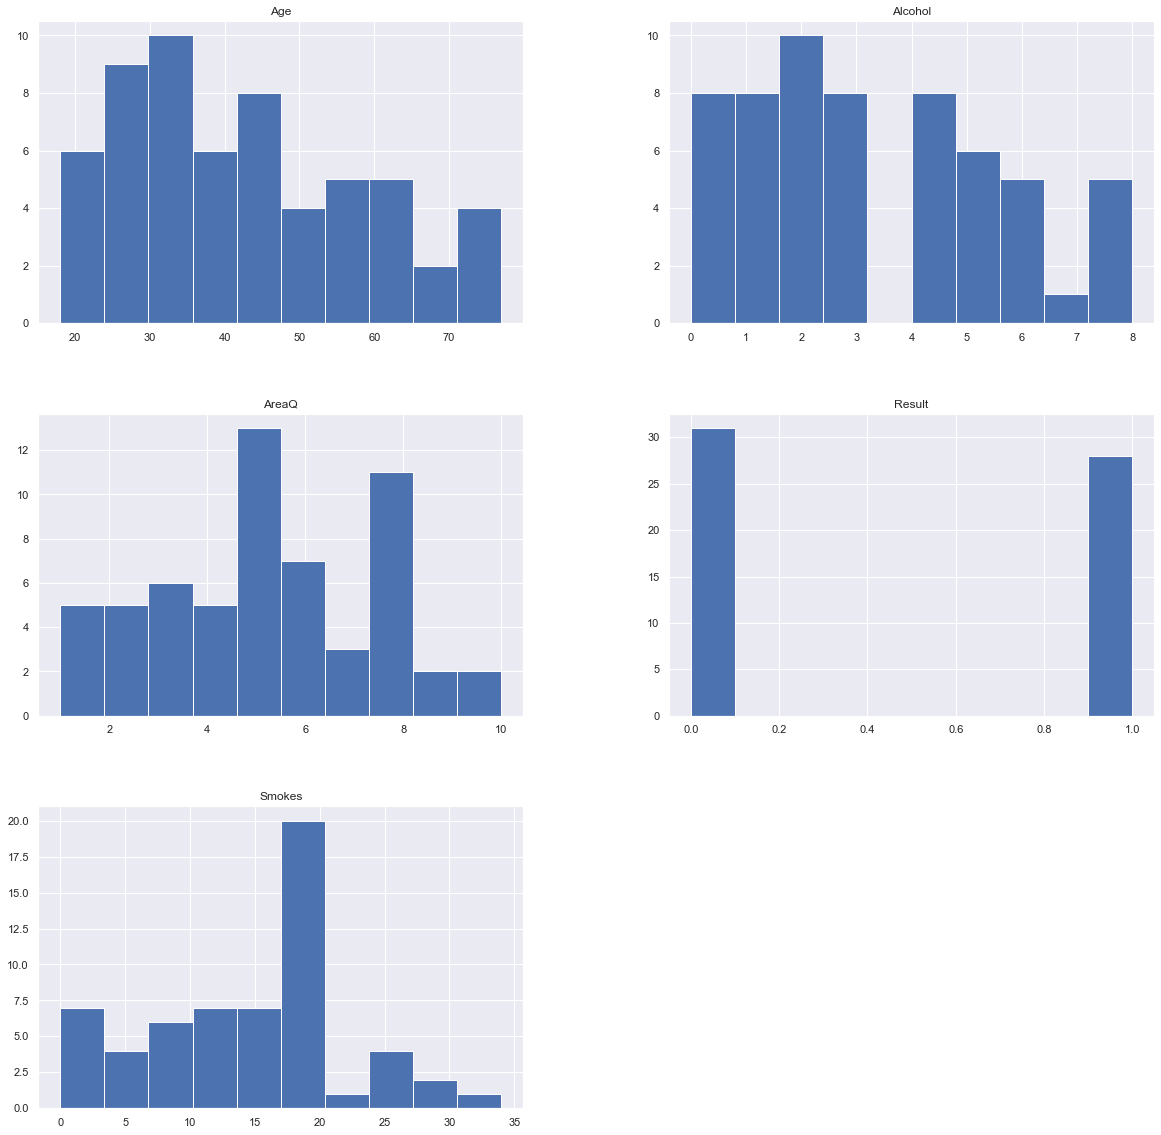

In [36]:
p = df.hist(figsize = (20,20))

In [37]:
#sns.pairplot(data =df)
plt.show()

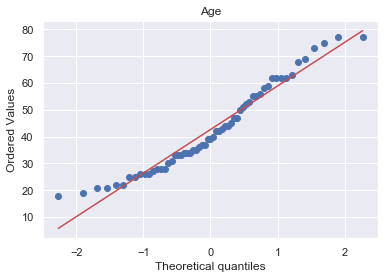

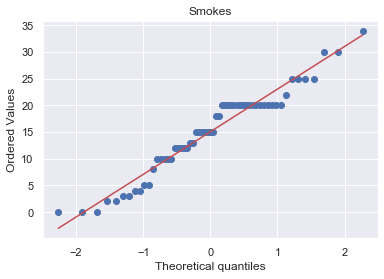

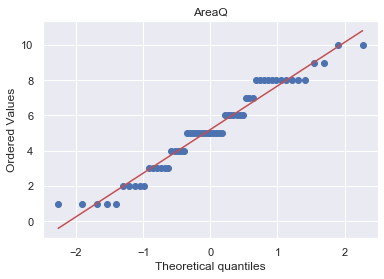

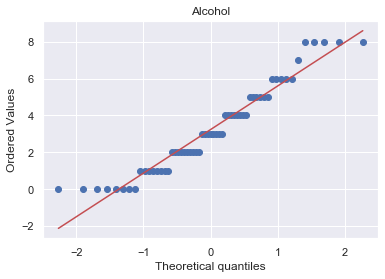

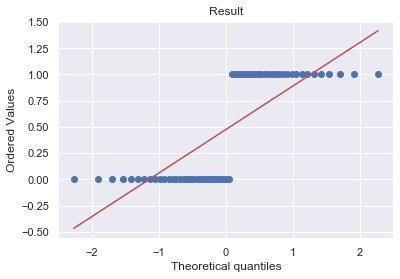

In [38]:
from scipy import stats
for feature in df.columns:
    stats.probplot(df[feature], plot = plt)
    plt.title(feature)
    plt.show()

In [39]:
df.head()


,Age,Smokes,AreaQ,Alcohol,Result
0,35,3,5,4,1
1,27,20,2,5,1
2,30,0,5,2,0
3,28,0,8,1,0
4,68,4,5,6,1


In [40]:
X = df.iloc[:,1 :-1]
y = df.iloc[:, 0]


In [41]:
X.head()


,Smokes,AreaQ,Alcohol
0,3,5,4
1,20,2,5
2,0,5,2
3,0,8,1
4,4,5,6


In [42]:
y.head()


0    35
1    27
2    30
3    28
4    68
Name: Age, dtype: int64

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [44]:
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler 
scaler=StandardScaler()
scaler.fit(df) 
scaled_data=scaler.transform(df) 
scaled_data 

array([[-0.47382073, -1.52435619, -0.08332128,  0.32314781,  1.05220856],
       [-0.97080603,  0.62301636, -1.31231015,  0.74683049,  1.05220856],
       [-0.78443655, -1.90330429, -0.08332128, -0.52421755, -0.95038193],
       [-0.90868287, -1.90330429,  1.14566759, -0.94790023, -0.95038193],
       [ 1.57624364, -1.39804016, -0.08332128,  1.17051317,  1.05220856],
       [-0.5359439 , -1.90330429,  1.96499351, -1.37158291, -0.95038193],
       [ 0.95501201, -0.0085638 ,  1.96499351, -1.37158291, -0.95038193],
       [-1.28142185, -0.3875119 , -0.08332128, -0.52421755, -0.95038193],
       [ 0.14741089, -1.65067222,  0.32634168, -1.37158291, -0.95038193],
       [ 0.58227303,  0.3703843 , -0.49298424,  0.74683049,  1.05220856],
       [-0.59806706, -1.39804016,  1.14566759, -1.37158291, -0.95038193],
       [-1.5299145 , -0.64014396,  0.32634168, -0.10053487, -0.95038193],
       [-1.09505236, -1.65067222, -0.08332128, -0.94790023, -0.95038193],
       [-0.90868287,  0.62301636, -1.3

In [45]:
from sklearn.decomposition import PCA 

pca=PCA(n_components=4) 

pca.fit(scaled_data) 
x_pca=pca.transform(scaled_data) 


In [46]:
scaled_data.shape 

(59, 5)

In [47]:
x_pca.shape 

(59, 4)

In [48]:
from sklearn.model_selection import train_test_split 
y = df.iloc[:, -1] 
X_train, X_test, y_train, y_test = train_test_split(x_pca, y, test_size = 0.2, random_state = 0) 

In [49]:
def svm_classifier(X_train, X_test, y_train, y_test):
    
    classifier_svm = SVC(kernel = 'rbf', random_state = 0)
    classifier_svm.fit(X_train, y_train)

    y_pred = classifier_svm.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    return print(f"Train score : {classifier_svm.score(X_train, y_train)}\nTest score : {classifier_svm.score(X_test, y_test)}")

In [50]:
def knn_classifier(X_train, X_test, y_train, y_test):
    
    classifier_knn = KNeighborsClassifier(metric = 'minkowski', p = 2)
    classifier_knn.fit(X_train, y_train)

    y_pred = classifier_knn.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    return print(f"Train score : {classifier_knn.score(X_train, y_train)}\nTest score : {classifier_knn.score(X_test, y_test)}")

In [51]:
def naive_classifier(X_train, X_test, y_train, y_test):
    
    classifier_naive = GaussianNB()
    classifier_naive.fit(X_train, y_train)

    y_pred = classifier_naive.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    return print(f"Train score : {classifier_naive.score(X_train, y_train)}\nTest score : {classifier_naive.score(X_test, y_test)}")

In [52]:
def tree_classifier(X_train, X_test, y_train, y_test):
    
    classifier_tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    classifier_tree.fit(X_train, y_train)

    y_pred = classifier_tree.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    return print(f"Train score : {classifier_tree.score(X_train, y_train)}\nTest score : {classifier_tree.score(X_test, y_test)}")


In [53]:
def forest_classifier(X_train, X_test, y_train, y_test):
    classifier_forest = RandomForestClassifier(criterion = 'entropy', random_state = 0)
    classifier_forest.fit(X_train, y_train)

    y_pred = classifier_forest.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    return print(f"Train score : {classifier_forest.score(X_train, y_train)}\nTest score : {classifier_forest.score(X_test, y_test)}")

In [54]:
def logistic_regression (X_train,X_test,y_train,y_test):

  from sklearn.linear_model import LogisticRegression
  model = LogisticRegression(random_state = 0)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  cm = confusion_matrix(y_test, y_pred)
  
  return print(f"Train score : {model.score(X_train, y_train)}\nTest score : {model.score(X_test, y_test)}")

In [55]:

def print_score(X_train, X_test, y_train, y_test):
    print("SVM:\n")
    svm_classifier(X_train, X_test, y_train, y_test)

    print("-"*100)
    print()

    print("KNN:\n")
    knn_classifier(X_train, X_test, y_train, y_test)

    print("-"*100)
    print()

    print("Naive:\n")
    naive_classifier(X_train, X_test, y_train, y_test)

    print("-"*100)
    print()

    print("Decision Tree:\n")
    tree_classifier(X_train, X_test, y_train, y_test)

    print("-"*100)
    print()

    print("Random Forest:\n")
    forest_classifier(X_train, X_test, y_train, y_test)
    
    print("-"*100)
    print()

    print("logistic Regression:\n")
    logistic_regression(X_train, X_test, y_train, y_test)

    print("-"*100)
    print()

In [56]:
print_score(X_train, X_test, y_train, y_test)


SVM:

Train score : 1.0
Test score : 1.0
----------------------------------------------------------------------------------------------------

KNN:

Train score : 0.9787234042553191
Test score : 1.0
----------------------------------------------------------------------------------------------------

Naive:

Train score : 1.0
Test score : 1.0
----------------------------------------------------------------------------------------------------

Decision Tree:

Train score : 1.0
Test score : 1.0
----------------------------------------------------------------------------------------------------

Random Forest:

Train score : 1.0
Test score : 1.0
----------------------------------------------------------------------------------------------------

logistic Regression:

Train score : 1.0
Test score : 1.0
----------------------------------------------------------------------------------------------------



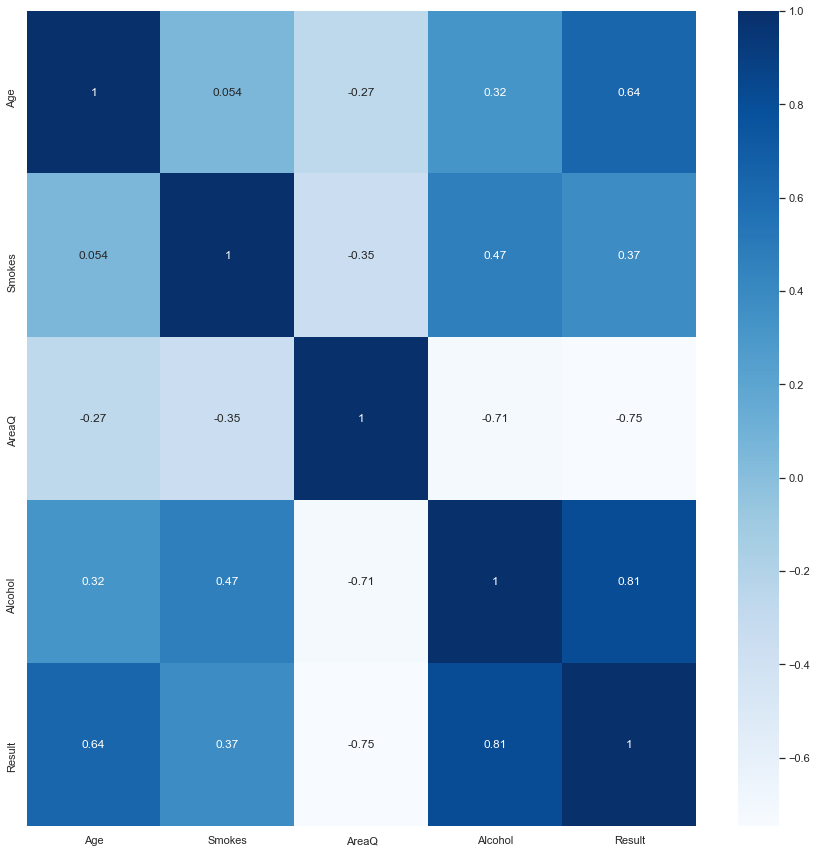

In [57]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot = True, cmap = "Blues")
plt.show() 

In [58]:
classifier_forest = RandomForestClassifier(criterion = 'entropy')
classifier_forest.fit(X_train, y_train)
y_pred = classifier_forest.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cm
print(cm)


[[8 0]
 [0 4]]


In [59]:
from sklearn.metrics import confusion_matrix
classifier_forest = GaussianNB()
classifier_forest.fit(X_train, y_train)
y_pred = classifier_forest.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[8 0]
 [0 4]]


In [60]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,8,0,8
1,0,4,4
All,8,4,12


In [61]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         4

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12



In [62]:
import pickle
filename = 'lungcancer.pkl'
pickle.dump(classifier_forest, open(filename, 'wb'))  

In [63]:

#model = open('heart.pkl','rb')
#forest = pickle.load(model) 

In [64]:
#y_pred = forest.predict(X_test) 

In [65]:
#confusion_matrix(y_test, y_pred) 